# Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import cv2

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Tensorflow
from tensorflow.keras import layers
from tensorflow.keras.utils import normalize
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from keras.utils import to_categorical

C:\Users\Salma\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Load Data Sets

In [3]:
# Read train data set
train_path = r'C:\Users\Salma\Downloads\DL\dataset\training_set'
Categories = [i for i in os.listdir(train_path)]

training_data = []

for category in Categories:
    label = Categories.index(category)
    path = os.path.join(train_path, category)
    
    for img in (os.listdir(path)):
        image_path = os.path.join(path, img)
        try:
            image = cv2.imread(image_path)
            image = cv2.resize(image, (150, 150))
            training_data.append([image, label])
        except Exception as e:
            pass

In [4]:
# Read test data set
test_path = r'C:\Users\Salma\Downloads\DL\dataset\test_set'
Categories = [i for i in os.listdir(test_path)]

test_data = []

for category in Categories:
    label = Categories.index(category)
    path = os.path.join(test_path, category)
    
    for img in (os.listdir(path)):
        image_path = os.path.join(path, img)
        try:
            image = cv2.imread(image_path)
            image = cv2.resize(image, (250, 250))
            test_data.append([image, label])
        except Exception as e:
            pass

# Split Data into train and validation

In [5]:
# For train data
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X)
y = np.array(y)

In [6]:
# For test data
X_test = []
y_test = []

for features, label in training_data:
    X_test.append(features)
    y_test.append(label)
X_test = np.array(X)
y_test = np.array(y)

In [7]:
# Splite training datainto tain and validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

# Check shape
print(f'The X_train shape is {X_train.shape}')
print(f'The y_train shape is {y_train.shape}')
print(f'The X_valid shape is {X_valid.shape}')
print(f'The y_valid shape is {y_valid.shape}')
print(f'The X_test shape is {X_test.shape}')
print(f'The y_test shape is {y_test.shape}')

The X_train shape is (5600, 150, 150, 3)
The y_train shape is (5600,)
The X_valid shape is (2400, 150, 150, 3)
The y_valid shape is (2400,)
The X_test shape is (8000, 150, 150, 3)
The y_test shape is (8000,)


# Exploratory Data Analysis (EDA)

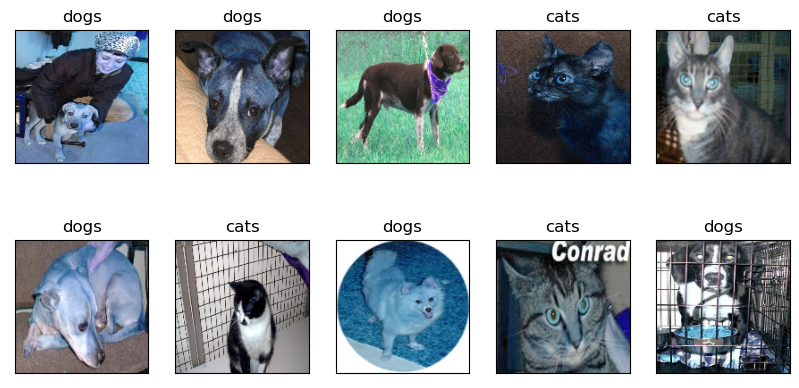

In [8]:
# Display 10 images from the train data

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i])
    plt.title(f'{Categories[y_train[i]]}')
    plt.xticks([])
    plt.yticks([])
plt.show()

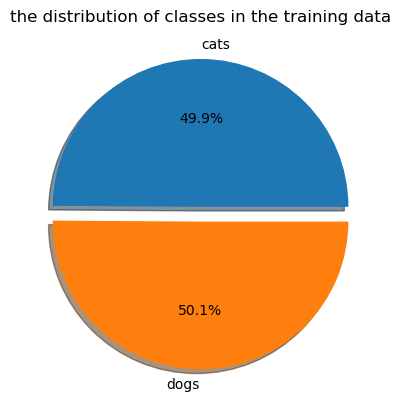

In [9]:
# Check data balance
plt.pie([len(y_train[y_train==0]), len(y_train[y_train==1])], labels=Categories, autopct='%1.1f%%', explode=[0.05, 0.05], shadow=True)
plt.title('the distribution of classes in the training data')
plt.show()

* > `Comment: From the pie chart, it is found that training data is almost balanced.`

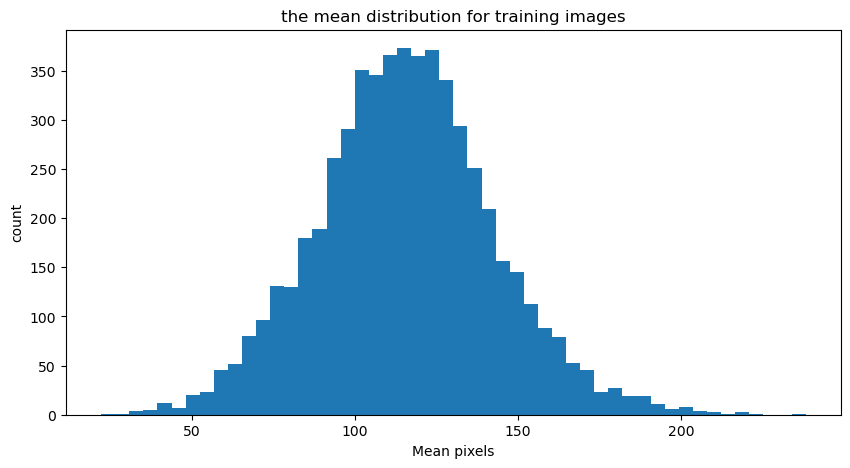

In [10]:
# Check some the statistical mesures distributions
plt.figure(figsize=(10, 5))
mean_pixels = [np.mean(img) for img in X_train]

plt.hist(mean_pixels, bins=50)
plt.title('the mean distribution for training images')
plt.xlabel('Mean pixels')
plt.ylabel('count')
plt.show()

* > `Comment: It seems that Pixels distribution is normal.`

# Data Preprocessing

In [11]:
# Normalizing pixels
X_train = normalize(X_train)
X_valid = normalize(X_valid)
X_test = normalize(X_test)

In [12]:
y_train_encoded = to_categorical(y_train, num_classes=2)
y_valid_encoded = to_categorical(y_valid, num_classes=2)
y_test_encoded = to_categorical(y_test, num_classes=2)

# Building CNN model

In [13]:
model = Sequential([
    Conv2D(filters=512, activation='elu', kernel_size=(3, 3), input_shape=X_train[0].shape),
    MaxPooling2D((2, 2)),
    Conv2D(filters=256, activation='elu', kernel_size=(3, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(filters=128, activation='elu', kernel_size=(3, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(filters=64, activation='elu', kernel_size=(3, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(filters=32, activation='relu', kernel_size=(3, 3)),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(512, activation='elu'),
    Dense(256, activation='elu'),
    Dense(128, activation='elu'),
    Dense(64, activation='relu'),
    Dense(32, activation='elu'),
    Dropout(0.2),
    Dense(len(np.unique(y_train)), activation='sigmoid')
    
])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 512)     14336     
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 512)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 256)       1179904   
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       295040    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)      

In [14]:
# Compile the CNN model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics='accuracy', run_eagerly=True)

In [15]:
# Set the checkpoint and earlystoping
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)

early_stopping = EarlyStopping(monitor='val_accuracy', mode='max', patience=5, restore_best_weights=True)

In [16]:
# Train the model
history = model.fit(X_train, y_train_encoded, validation_data=(X_valid, y_valid_encoded), epochs=30, batch_size=32, callbacks=[checkpoint,early_stopping])

Epoch 1/30

175/175 [==============================] - ETA: 0s - loss: 0.6948 - accuracy: 0.5071

C:\Users\Salma\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


175/175 [==============================] - 1204s 7s/step - loss: 0.6948 - accuracy: 0.5071 - val_loss: 0.6909 - val_accuracy: 0.4979
Epoch 2/30
175/175 [==============================] - 1136s 6s/step - loss: 0.6749 - accuracy: 0.5698 - val_loss: 0.6683 - val_accuracy: 0.6012
Epoch 3/30
175/175 [==============================] - 915s 5s/step - loss: 0.6468 - accuracy: 0.6223 - val_loss: 0.6624 - val_accuracy: 0.5975
Epoch 4/30
175/175 [==============================] - 914s 5s/step - loss: 0.6247 - accuracy: 0.6495 - val_loss: 0.6381 - val_accuracy: 0.6313
Epoch 5/30
175/175 [==============================] - 893s 5s/step - loss: 0.6134 - accuracy: 0.6650 - val_loss: 0.6321 - val_accuracy: 0.6375
Epoch 6/30
175/175 [==============================] - 844s 5s/step - loss: 0.6037 - accuracy: 0.6659 - val_loss: 0.6207 - val_accuracy: 0.6596
Epoch 7/30
175/175 [==============================] - 846s 5s/step - loss: 0.5817 - accuracy: 0.6850 - val_loss: 0.6235 - val_accuracy: 0.6471
Epoch 8/

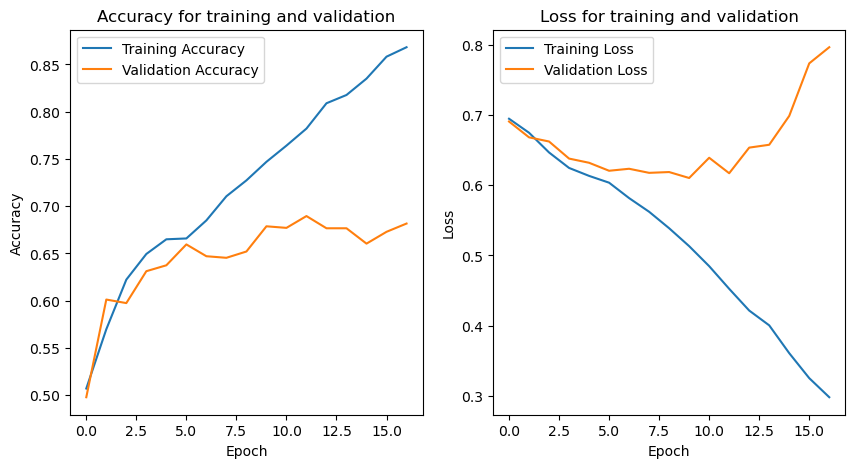

In [17]:
# Plot accuracy for training and validation
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy for training and validation')


# Plot loss for training and validation
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss for training and validation')

plt.show()

In [18]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print(f'Test accuracy: {accuracy*100: .2f}%')
print(f'Test loss: {loss: .4f}')

250/250 [==============================] - 331s 1s/step - loss: 0.4701 - accuracy: 0.7814
Test accuracy:  78.14%
Test loss:  0.4701


In [19]:
# Predict on the X_test
prediction = model.predict(X_test)

250/250 [==============================] - 334s 1s/step


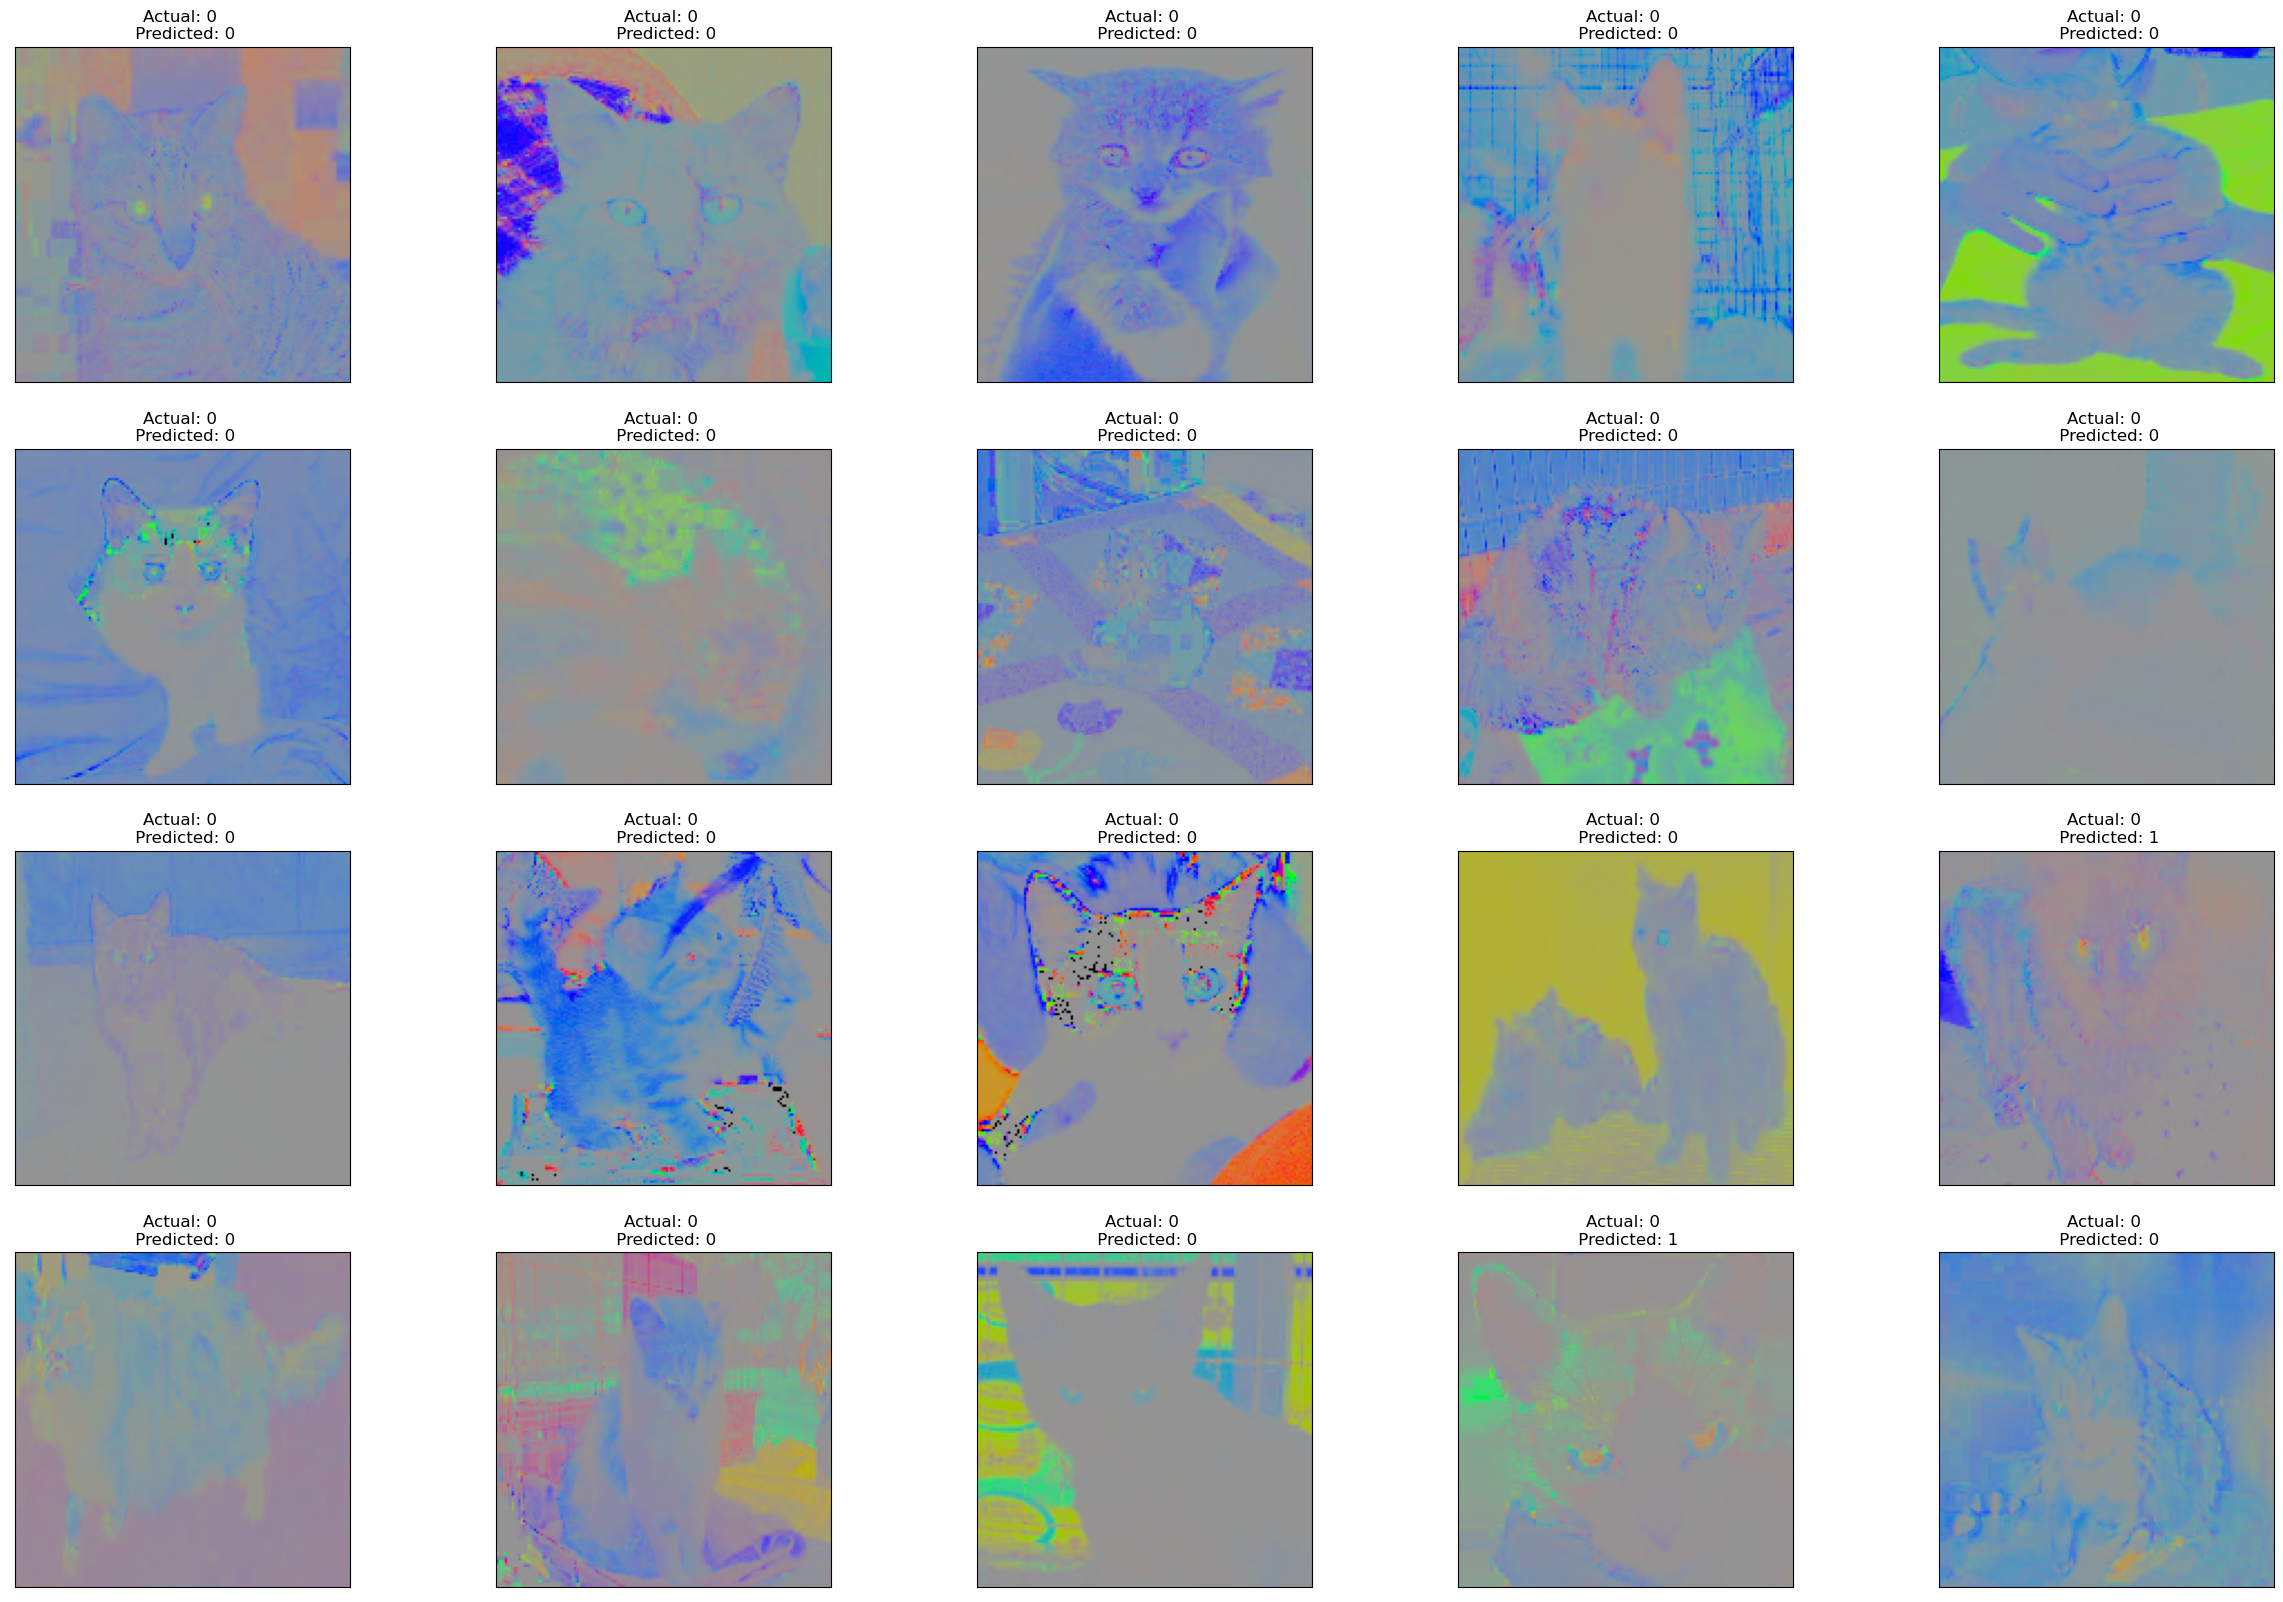

In [20]:
# Display some predicted images with predicted and actual labels
plt.figure(figsize=(30, 20))

for i in range(min(20, len(X_test))):
    plt.subplot(4, 5, i+1)
    plt.imshow(X_test[i])
    plt.xticks([])
    plt.yticks([])
    predicted_label = np.argmax(prediction[i])
    plt.title(f'Actual: {y_test[i]} \n Predicted: {predicted_label}')
    
plt.show()

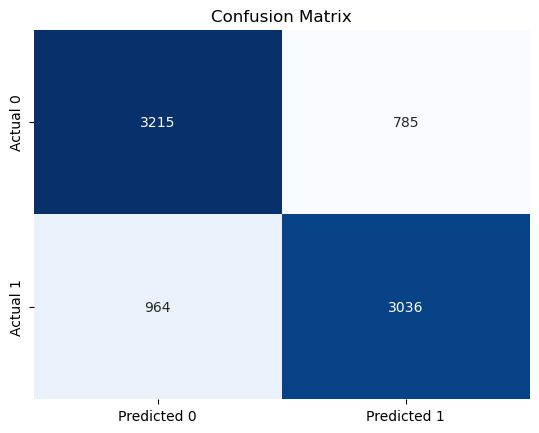

In [21]:
# Convert one-hot encoded y_test back to integer labels
y_test_labels = np.argmax(y_test_encoded, axis=1)

# Convert model predictions to integer labels
predicted_labels = np.argmax(prediction, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test_labels, predicted_labels)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.show()


In [22]:
print("The Classification Report on Test Data")
clf_report = classification_report(y_test_labels, predicted_labels)
print(clf_report)

The Classification Report on Test Data
              precision    recall  f1-score   support

           0       0.77      0.80      0.79      4000
           1       0.79      0.76      0.78      4000

    accuracy                           0.78      8000
   macro avg       0.78      0.78      0.78      8000
weighted avg       0.78      0.78      0.78      8000

